# Exercise 1

First of all, we import some usefull libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import sys

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, f1_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.mixture import GaussianMixture
sys.path.append("../../")

Then, we import our banknote data. We can show first 3 rows too.

In [2]:
data = pd.read_csv('data/banknote_authentication.csv')
data.head(3)

,a1,a2,a3,counterfeit
0,12.3784,0.70403,-7.5836,0
1,8.1881,-3.13380,-2.5276,0
2,-10.8679,9.49260,-1.4116,1


# A

We perform a quadraic discriminant analysis, so we divide our data in train-test sets.

In [3]:
atributes  = data.iloc[:, :3]
lbl = data.iloc[:, 3].astype('int32')

train_atributes, test_atributes, train_lbl, test_lbl = train_test_split(atributes, lbl, test_size=0.2)

Then, we train the classifier and obtain predictedd labels.

In [4]:
qda_classifier = QuadraticDiscriminantAnalysis()

qda_classifier.fit(train_atributes, train_lbl)
predicted = qda_classifier.predict(test_atributes)

Now, we calculate confusion matrix.

In [5]:
confusion_matrix_ = confusion_matrix(test_lbl, predicted)
print('The confusion matrix is: \n', confusion_matrix_)
#plt.imshow(confusion_matrix_)

The confusion matrix is: 
 [[102  22]
 [ 25  71]]


Then, we proceed to calculate ROC curve and AUC score with sklearn library. In order to do that, we calculate estimated probabilities with ${\it preditc\_proba}$ method. First of all, we calculate TPR and FPR scores.

In [6]:
qda_proba = qda_classifier.predict_proba(test_atributes)

fpr_qda, tpr_qda, ths_qda = roc_curve(test_lbl, qda_proba[:,1])

print('TPR =', np.round(tpr_qda, 3))
print('FPR =', np.round(fpr_qda, 3))

TPR = [0.    0.01  0.042 0.042 0.156 0.156 0.167 0.167 0.177 0.177 0.25  0.25
 0.281 0.281 0.281 0.281 0.302 0.302 0.333 0.333 0.344 0.344 0.385 0.385
 0.458 0.458 0.531 0.531 0.562 0.562 0.583 0.583 0.604 0.604 0.729 0.729
 0.74  0.74  0.76  0.76  0.792 0.792 0.812 0.812 0.823 0.823 0.833 0.833
 0.844 0.844 0.854 0.854 0.885 0.885 0.906 0.906 0.917 0.917 0.917 0.927
 0.927 0.938 0.938 0.948 0.948 0.958 0.958 1.    1.   ]
FPR = [0.    0.    0.    0.008 0.008 0.016 0.016 0.024 0.024 0.04  0.04  0.048
 0.048 0.056 0.073 0.081 0.081 0.089 0.089 0.097 0.097 0.105 0.105 0.121
 0.121 0.129 0.129 0.137 0.137 0.145 0.145 0.153 0.153 0.161 0.161 0.169
 0.169 0.185 0.185 0.21  0.21  0.218 0.218 0.234 0.234 0.258 0.258 0.274
 0.274 0.282 0.282 0.29  0.29  0.306 0.306 0.315 0.315 0.323 0.347 0.347
 0.355 0.355 0.403 0.403 0.444 0.444 0.782 0.782 1.   ]


Finally, we calculate that AUC score and plot ROC curve. We remark that red line, between points $[0, 0]$ and $[1, 1]$ is randomly classified (this would be the standart classifier with $TPR, FPR = [0, 1]$).

AUC score: 0.8403897849462365


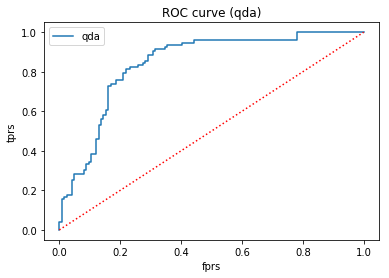

In [7]:
print('AUC score:', roc_auc_score(test_lbl, qda_proba[:,1]))

plt.plot(fpr_qda, tpr_qda, label = 'qda')
plt.plot([0, 1], [0, 1], ':r')

plt.xlabel(u'fprs')
plt.ylabel(u'tprs')
plt.title(u'ROC curve (qda)')
plt.legend(loc = 'best')
plt.show()

# B

We're using an implementation from scikit-learn library provided by the ${\it GaussianMixture}$ class.

We fill fit each class separatelly to a two Gaussian mixture

In [8]:
bn0_cmp = GaussianMixture(n_components=2, max_iter=100, tol=0.0001) 
bn1_cmp = GaussianMixture(n_components=2, max_iter=100, tol=0.0001) 

bn0_atributes = train_atributes[train_lbl == 0]
bn0_lbl = train_lbl[train_lbl == 0]

bn1_atributes = train_atributes[train_lbl == 1]
bn1_lbl = train_lbl[train_lbl == 1]

bn0_cmp.fit(bn0_atributes, bn0_lbl)
bn1_cmp.fit(bn1_atributes, bn1_lbl)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.0001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

The fitted parameters are accesible as attributes of the ${\it GaussianMixture}$ object.

In [9]:
print(bn0_cmp.weights_)  #pi
print(bn0_cmp.means_)    #mu
print(bn0_cmp.covariances_) #Sigma (covariance) matrices

[0.53088425 0.46911575]
[[ 8.41347528 -1.26619943 -2.40976508]
 [-0.38432655  3.1608538   0.33773587]]
[[[ 3.60693289 -0.40764358 -2.96739742]
  [-0.40764358  4.27223537  0.19685739]
  [-2.96739742  0.19685739  4.12489738]]

 [[ 9.11345237 -3.80469582  1.1777547 ]
  [-3.80469582  6.42731618 -1.09552194]
  [ 1.1777547  -1.09552194  0.78464826]]]


Then, we difine next usefull functions in order to get mgd predicted probability.

In [10]:
def make_pdf(cmp):
    """
    Takes a GaussianMixture object and returns corresponding
    probability distribution function
    """
    n_cmp = cmp.n_components
    dists = [st.multivariate_normal(cmp.means_[i], cmp.covariances_[i]) for i in range(n_cmp)]
    def pdf(x):
        p = 0.0
        for i in range(n_cmp):
            p+= cmp.weights_[i]*dists[i].pdf(x)
        return p
    
    return pdf
    
    
def make_predict_proba(cmp0, cmp1, pi0=0.5, pi1=.5):
    """
    Takes two GaussianMixture object and corresponding priors and returns 
    pdf for conditional probability P(c=1|x)
    """
    pdf0 = make_pdf(cmp0)
    pdf1 = make_pdf(cmp1)
    def p(x):
        p0=pi0*pdf0(x)
        p1=pi1*pdf1(x)
        return p1/(p1+p0)    
        
    return p

We calculate these predicted probabilities and print de confusion matrix.

In [11]:
mgd_predict_proba = make_predict_proba(bn0_cmp, bn1_cmp, 0.5, 0.5)

mgd_proba = mgd_predict_proba(test_atributes)

_confusion_matrix_ = confusion_matrix(test_lbl, mgd_proba>0.5)
print('The confusion matrix is: \n', _confusion_matrix_ / np.max(_confusion_matrix_)) # We take threeshold equal to 0.5

The confusion matrix is: 
 [[1.         0.16981132]
 [0.20754717 0.69811321]]


Then, we calculate AUC score and plot the ROC curve.

AUC score: 0.9203629032258064


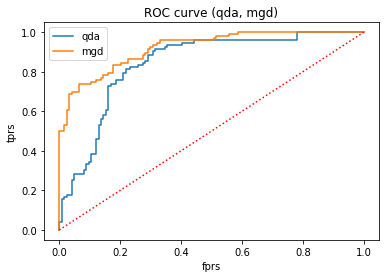

In [12]:
print('AUC score:', roc_auc_score(test_lbl, mgd_proba))

fpr_mgd, tpr_mgd, ths_mgd = roc_curve(test_lbl, mgd_proba)

plt.plot(fpr_qda, tpr_qda, label = 'qda')
plt.plot(fpr_mgd, tpr_mgd, label = 'mgd')
plt.plot([0, 1], [0, 1], ':r')

plt.xlabel(u'fprs')
plt.ylabel(u'tprs')
plt.title(u'ROC curve (qda, mgd)')
plt.legend(loc = 'best')
plt.show()

We see an important improvement in the quality of the classifier (explainable by looking at the fitted components and the new decision boundary).

# C

Firstly, we iterate over all number of gaussians and calculate f1 score for each combination of gaussians. Then, each time the score improves, we update the best number of gaussians and their mean f1 score.

In [13]:
n_splits = 5; N_gaussians = 10; best_f1_score = 0
skf = StratifiedKFold(n_splits)

for number_gaussians_1 in np.arange(1, N_gaussians+1):
    for number_gaussians_2 in np.arange(1, N_gaussians+1):
        actual_f1_score = 0
        
        for train_index, test_index in skf.split(atributes, lbl): # We go through different stratified folders
            X_train, X_test = atributes.iloc[train_index], atributes.iloc[test_index]
            y_train, y_test = lbl.iloc[train_index], lbl.iloc[test_index]
            
            bn0_cmp = GaussianMixture(n_components=number_gaussians_1, max_iter=100, tol=0.0001)
            bn1_cmp = GaussianMixture(n_components=number_gaussians_2, max_iter=100, tol=0.0001)
            
            bn0_atributes = X_train[y_train == 0]
            bn0_lbl = y_train[y_train == 0]
            
            bn1_atributes = X_train[y_train == 1]
            bn1_lbl = y_train[y_train == 1]
            
            bn0_cmp.fit(bn0_atributes, bn0_lbl)
            bn1_cmp.fit(bn1_atributes, bn1_lbl)
            
            mgd_predict_proba = make_predict_proba(bn0_cmp, bn1_cmp, 0.5, 0.5)
            mgd_proba_out = mgd_predict_proba(X_test)
            
            actual_f1_score += f1_score(y_test, mgd_proba_out>0.5, average='macro')

        if actual_f1_score > best_f1_score: # We could divide error by n_splits, but not necessary
            best_number_gaussians_1 = number_gaussians_1
            best_number_gaussians_2 = number_gaussians_2
            best_f1_score = actual_f1_score

print('Best number of gaussians for positive, negative elements is: (', best_number_gaussians_1, ',', best_number_gaussians_2, ') with f1 sore:', best_f1_score / n_splits)

Best number of gaussians for positive, negative elements is: ( 9 , 7 ) with f1 sore: 0.9575686433574088


Now, we use previous data sets and calculate all requested elements.

In [14]:
bn0_cmp_best = GaussianMixture(n_components=best_number_gaussians_1, max_iter=100, tol=0.0001) 
bn1_cmp_best = GaussianMixture(n_components=best_number_gaussians_2, max_iter=100, tol=0.0001) 

bn0_atributes_best = train_atributes[train_lbl == 0]
bn0_lbl_best = train_lbl[train_lbl == 0]

bn1_atributes_best = train_atributes[train_lbl == 1]
bn1_lbl_best = train_lbl[train_lbl == 1]

bn0_cmp_best.fit(bn0_atributes_best, bn0_lbl_best)
bn1_cmp_best.fit(bn1_atributes_best, bn1_lbl_best)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=7, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.0001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

We calculate these predicted probabilities and print de confusion matrix.

In [15]:
mgd_predict_proba_best = make_predict_proba(bn0_cmp_best, bn1_cmp_best, 0.5, 0.5)

mgd_proba_best = mgd_predict_proba_best(test_atributes)

_confusion_matrix_best = confusion_matrix(test_lbl, mgd_proba_best>0.5)
print('The confusion matrix is: \n', _confusion_matrix_best / np.max(_confusion_matrix_best)) # We take threeshold equal to 0.5

The confusion matrix is: 
 [[1.         0.03333333]
 [0.075      0.725     ]]


Then, we calculate AUC score and plot the ROC curve.

AUC score: 0.9825268817204301


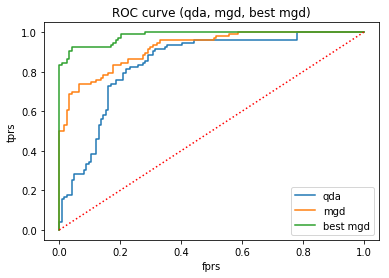

In [16]:
print('AUC score:', roc_auc_score(test_lbl, mgd_proba_best))

fpr_mgd_best, tpr_mgd_best, ths_mgd_best = roc_curve(test_lbl, mgd_proba_best)

plt.plot(fpr_qda, tpr_qda, label = 'qda')
plt.plot(fpr_mgd, tpr_mgd, label = 'mgd')
plt.plot(fpr_mgd_best, tpr_mgd_best, label = 'best mgd')
plt.plot([0, 1], [0, 1], ':r')

plt.xlabel(u'fprs')
plt.ylabel(u'tprs')
plt.title(u'ROC curve (qda, mgd, best mgd)')
plt.legend(loc = 'best')
plt.show()

We see again an important improvement in the quality of the classifier by changing number of gaussians in the mgd.

# D

First of all, we define losses function. Where using FPR and TPR scores, which we calculated in previous cases.

We know that:

\begin{equation}
    TP + FN = 0.01; \hspace{0.1cm} FN_{penalty} = 100; \hspace{0.1cm} FP_{penalty} = 15
\end{equation}

So, losses function is:

\begin{equation}
    losses = FN_{penalty} \hspace{0.1cm} FN + FP_{penalty} \hspace{0.1cm} FP = FN_{penalty} \hspace{0.1cm} FPR \hspace{0.1cm} (TP + FN) + FP_{penalty} \hspace{0.1cm} (1 - TPR) \hspace{0.1cm} (1 - TP - FN)
\end{equation}

And, finally:

\begin{equation}
    losses = 100 \hspace{0.1cm} FPR \hspace{0.1cm} 0.01 + 15 \hspace{0.1cm} (1 - TPR) \hspace{0.1cm} 0.99
\end{equation}

Then, we define another function in order to calculate all losses and find the minimum.

In [17]:
def losses(FPR, TPR):
    return 100 * FPR * 0.01 + 15 * (1 - TPR) * 0.99

def best_threeshold(TPR, FPR, THS):
    cumulative_loss = []
    len_THS = len(THS)
    for i in range(len_THS):
        cumulative_loss.append(losses(FPR[i], TPR[i]))
    pos = len_THS - np.argmin(cumulative_loss)
    return np.min(cumulative_loss), THS[pos], pos

Now, we iterate over our three classifiers and find the best one with its threeshold.

In [18]:
classifiers = ['qda', 'mgd', 'mgd_best']
TPRs = [tpr_qda, tpr_mgd, tpr_mgd_best]
FPRs = [fpr_qda, fpr_mgd, fpr_mgd_best]
THSs = [ths_qda, ths_mgd, ths_mgd_best]

positions = []
for i in range(len(classifiers)):
    TPR = TPRs[i]; FPR = FPRs[i]; THS = THSs[i]
    minimum_loss, threeshold, pos = best_threeshold(TPR, FPR, THS)
    positions.append(pos)
    print('For', classifiers[i], 'classifier, minimum losses for each banknote is:', minimum_loss, 'with threeshold:', threeshold)

For qda classifier, minimum losses for each banknote is: 0.782258064516129 with threeshold: 0.9928805030682314
For mgd classifier, minimum losses for each banknote is: 0.5887096774193549 with threeshold: 0.9498574720764777
For mgd_best classifier, minimum losses for each banknote is: 0.28225806451612906 with threeshold: 0.826237313464124


Finally, we can plot them and the point which minimize losses, so we can make a comparison. We can see that qda classifer is the worst one (it gives biggest losses with highest threeshold). What's more, mgd_best classifier is the best one, because it has the smallest losses and (somentimes) smaller threeshold, which allowd bigger benefits (we're accepting more banknotes).

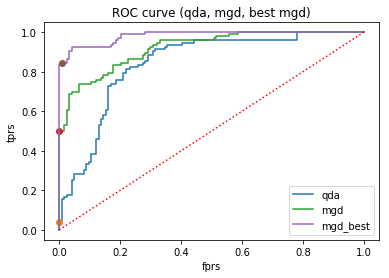

In [19]:
for i in range(3):
    FPR = FPRs[i]
    TPR = TPRs[i]
    plt.plot(FPR, TPR, label = classifiers[i])
    plt.plot(FPR[positions[i]], TPR[positions[i]], 'o')

plt.plot([0, 1], [0, 1], ':r')

plt.xlabel(u'fprs')
plt.ylabel(u'tprs')
plt.title(u'ROC curve (qda, mgd, best mgd)')
plt.legend(loc = 'best')
plt.show()

It make sense that, the bigger the penalization is for FN than for FP, the worse is to accept a possible valid banknote than to refuse it. So, the benefits will be smaller, but the losses too. That's why we have higher than 0.5 threesholds: he have to make sure that the banknote will be valid.